In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.corr()['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [4]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

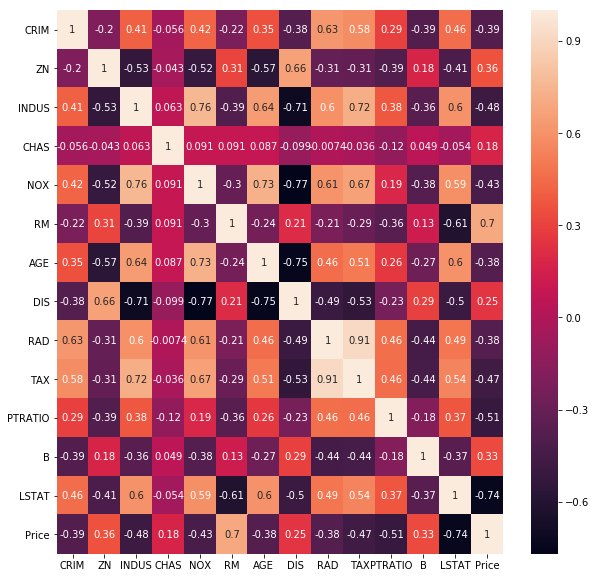

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_df.corr(),annot=True)

In [8]:
# Multicolinearity

X = boston_df.drop(['Price'],axis=1)
y = boston_df['Price']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=17)

In [10]:
print('The dimensionof X_train is {}'.format(X_train.shape))
print(f'The dimensionof X_test is {X_test.shape}')


The dimensionof X_train is (354, 13)
The dimensionof X_test is (152, 13)


In [15]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rnd = RandomForestRegressor()

In [16]:
for clf in (lr,dt,rnd):
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    print(f'Train Accuracy for {clf.__class__.__name__} is {train_score}')

    test_score = clf.score(X_test, y_test)
    print(f'Test Accuracy for {clf.__class__.__name__} is {test_score}')

    print('********************************************************************************')

Train Accuracy for LinearRegression is 0.7295579805153971
Test Accuracy for LinearRegression is 0.7620882852026809
********************************************************************************
Train Accuracy for DecisionTreeRegressor is 1.0
Test Accuracy for DecisionTreeRegressor is 0.8222046673078419
********************************************************************************
Train Accuracy for RandomForestRegressor is 0.9789148981525849
Test Accuracy for RandomForestRegressor is 0.9071090037208057
********************************************************************************


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#Linear and ridge regression models

lr = LinearRegression()
lr.fit(X_train, y_train)

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print(f'The Train score for lr model is {train_score_lr}')
print(f'The Test score for lr model is {test_score_lr}')


The Train score for lr model is 0.7295579805153971
The Test score for lr model is 0.7620882852026806


In [13]:
#Model 2
rid_reg = Ridge(alpha = 0.1)
rid_reg.fit(X_train, y_train)


Ridge(alpha=0.1)

In [14]:
#alpha=0.1
trainAccuracy = rid_reg.score(X_train,y_train)
testAccuracy = rid_reg.score(X_test,y_test)
print(f'Train Accuracy : {trainAccuracy}')
print(f'Test Accuracy: {testAccuracy}')


Train Accuracy : 0.729557697587067
Test Accuracy: 0.7621092942777207


In [15]:
#alpha=10
trainAccuracy = rid_reg.score(X_train,y_train)
testAccuracy = rid_reg.score(X_test,y_test)
print(f'Train Accuracy : {trainAccuracy}')
print(f'Test Accuracy: {testAccuracy}')


Train Accuracy : 0.729557697587067
Test Accuracy: 0.7621092942777207


In [16]:
#Model 3
las_reg = Lasso(alpha=0.1)
las_reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [17]:
#alpha=0.1
trainAccuracy = las_reg.score(X_train,y_train)
testAccuracy = las_reg.score(X_test,y_test)
print(f'Train Accuracy : {trainAccuracy}')
print(f'Test Accuracy: {testAccuracy}')

Train Accuracy : 0.7238555386425851
Test Accuracy: 0.7566100615602724


In [18]:
#alpha=10
trainAccuracy = las_reg.score(X_train,y_train)
testAccuracy = las_reg.score(X_test,y_test)
print(f'Train Accuracy : {trainAccuracy}')
print(f'Test Accuracy: {testAccuracy}')


Train Accuracy : 0.7238555386425851
Test Accuracy: 0.7566100615602724


In [19]:
from sklearn.feature_selection import SelectFromModel

In [20]:
model = SelectFromModel(las_reg)
model.fit(X_train, y_train)
selected_feature = X.columns[(model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(model.estimator_.coef_ == 0)))


total features: 13
selected features: 11
features with coefficients shrank to zero: 2


In [21]:
selected_feature

Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [22]:
model.estimator_.coef_ == 0

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False])